In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [2]:
import re
import spacy
nlp = spacy.load('en_core_web_sm')
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [3]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
df=pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding='latin',header=None,on_bad_lines='skip')
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.rename(columns={0:'label',5:'tweets'},inplace=True)
df.drop([1,2,3,4],axis=1,inplace=True)

In [6]:
df['label']=df['label'].replace(4,1)

In [7]:
df=df.sample(frac=1)
df.head()

,label,tweets
1449434,1,@boiselcd Get 100 followers a day using www.tw...
404336,0,my face and forearms are tan and that is it. fml
229704,0,"unsw volleyball svl: MH (W: 3-1), M1 (L: 0-3),..."
1048695,1,#followfriday @LaurensVerwijs @Chamin @davidal...
263218,0,Has a major bad headache!!


In [8]:
df=df.head(10000)
df['tweets']

1449434    @boiselcd Get 100 followers a day using www.tw...
404336     my face and forearms are tan and that is it. fml 
229704     unsw volleyball svl: MH (W: 3-1), M1 (L: 0-3),...
1048695    #followfriday @LaurensVerwijs @Chamin @davidal...
263218                           Has a major bad headache!! 
                                 ...                        
1484968    I'm watching Men in Black II while sewing in t...
218079             @billpalmer welcome to the new facebook! 
1173895                     @jakil see you soon bright eyes 
1036130    @GeorgiaPrincez ask her if she called the matt...
1545059    @horcrionebay oh wait! He's not lost anymore, ...
Name: tweets, Length: 10000, dtype: object

In [9]:
def get_ord_len(tweet):
    return len(tweet.split(' '))
def get_char_len(tweet):
    return len(tweet)


def preprocess_tweet(tweet):
    tweet=tweet.lower()
    tweet=re.sub(r"http\S+|www|S+|https\S+",'',tweet,flags=re.MULTILINE)
    tweet=re.sub(r"@\w+",'',tweet)
    tweet=re.sub(r'^\w\s#','',tweet)
    tokens=[token.lemma_ for token in nlp(tweet)]
    tokens=[token for token in tokens if token not in stopwords.words('english')]
    tokens=[token for token in tokens if len(token)>1]
    preproceesd_tweets=' '.join(tokens)
    return(preproceesd_tweets)
df['clean_tweets']=[preprocess_tweet(tw) for tw in tqdm(df['tweets'],position=0,leave=True)]
df['tweets_word_length']=df['clean_tweets'].apply(get_ord_len)
df['tweets_chars_length']=df['clean_tweets'].apply(get_char_len)

100%|██████████| 10000/10000 [01:41<00:00, 98.48it/s]


In [11]:
df.head()

,label,tweets,clean_tweets,tweets_word_length,tweets_chars_length
1063799,1,@kingboola woooohooo follow him the man will k...,woooohooo follow man keep rollin twitterafterd...,7,52
1438072,1,"@Oh_Yeah_Big_J Cool, thx for the suggestion. ...",cool thx suggestion start,4,25
990428,1,@CarylsRealm good inspirational morning to you,good inspirational morning,3,26
430356,0,@jeraa2t ok...didn't sleep well...def will nee...,ok ... sleep well ... def need nap later deal ...,15,76
182309,0,I'd rather enjoy starting a Naruto cosplay gro...,would rather enjoy start naruto cosplay group ...,18,106


In [12]:
negative=len(df[df['label']==0])
positive=len(df[df['label']==1])

In [13]:
fig = px.pie(values=[positive, negative], 
             title='Distribution of Positive and Negative Sentiments of the Tweets',
             names=['Positive', 'Negative'], 
             hover_name=['Positive', 'Negative'],
             opacity=0.9,
             template='simple_white')
fig.show()

In [14]:
from wordcloud import WordCloud

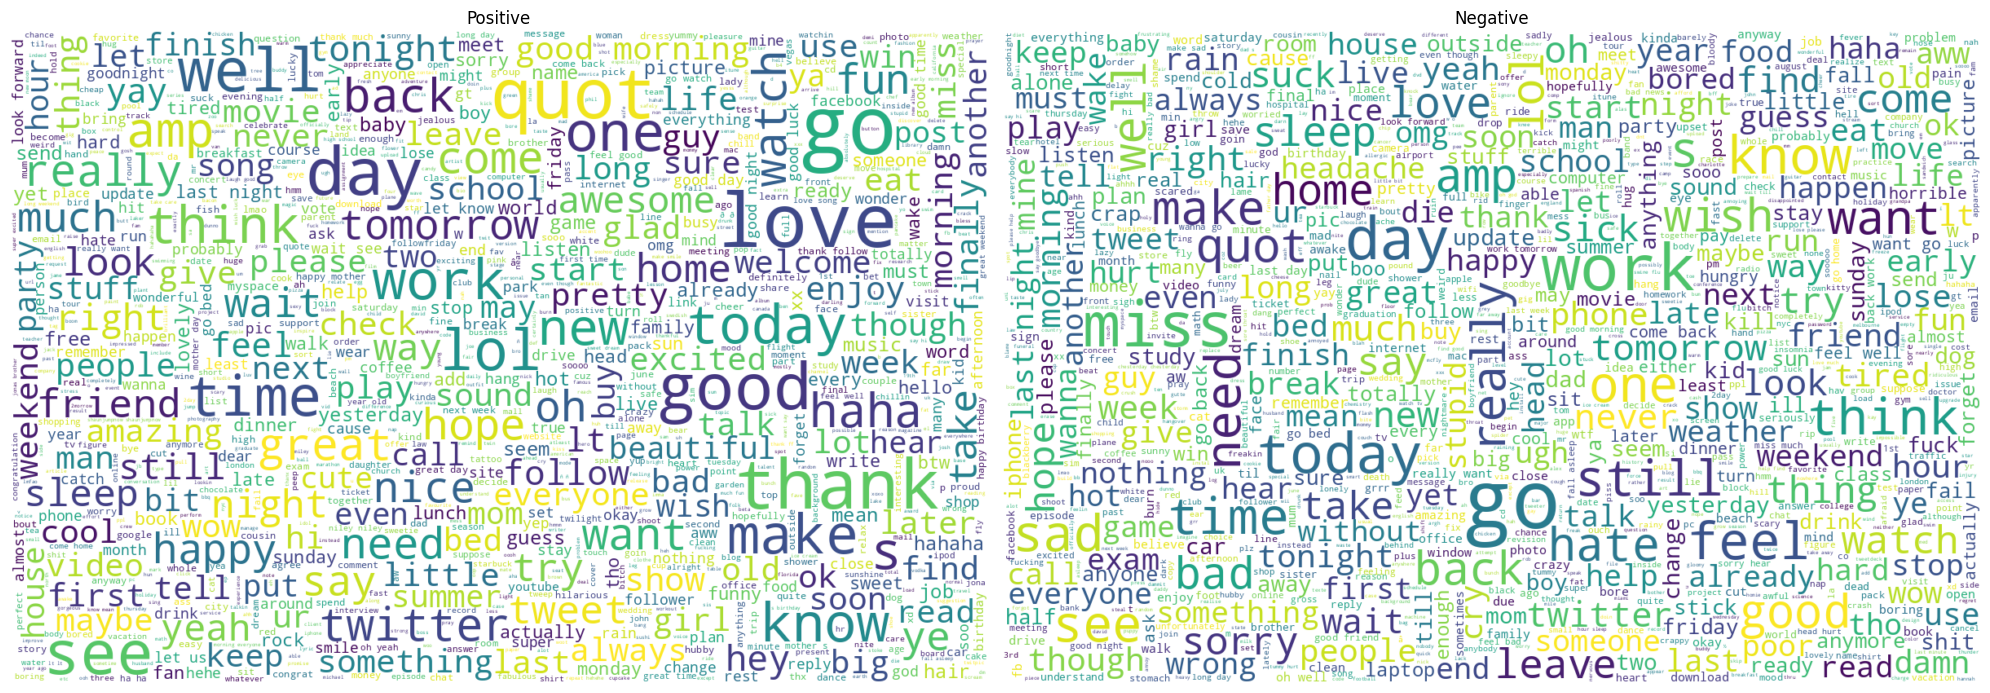

In [15]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
wordcloud1=WordCloud(width=1200,height=800,max_words=1000,contour_width=2,background_color='white',max_font_size=100,colormap='viridis').generate(' '.join(df[df['label']==1]['clean_tweets']))
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')
plt.title('Positive')
plt.subplot(1,2,2)
wordcloud1=WordCloud(width=1200,height=800,max_words=1000,contour_width=2,background_color='white',max_font_size=100,colormap='viridis').generate(' '.join(df[df['label']==0]['clean_tweets']))
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')
plt.title('Negative')
plt.tight_layout()
plt.show()



In [16]:
df.head(5)

,label,tweets,clean_tweets,tweets_word_length,tweets_chars_length
1063799,1,@kingboola woooohooo follow him the man will k...,woooohooo follow man keep rollin twitterafterd...,7,52
1438072,1,"@Oh_Yeah_Big_J Cool, thx for the suggestion. ...",cool thx suggestion start,4,25
990428,1,@CarylsRealm good inspirational morning to you,good inspirational morning,3,26
430356,0,@jeraa2t ok...didn't sleep well...def will nee...,ok ... sleep well ... def need nap later deal ...,15,76
182309,0,I'd rather enjoy starting a Naruto cosplay gro...,would rather enjoy start naruto cosplay group ...,18,106


In [34]:
df['tweets_word_length']

951457      3
99601      10
475335     16
713650      8
1006606     4
           ..
324769      5
794449      9
1584277     2
1231312     4
1146998     6
Name: tweets_word_length, Length: 10000, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,FlattenGRUB 

2024-05-07 12:03:12.908405: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 12:03:12.908578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 12:03:13.035189: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [46]:
vec=CountVectorizer(binary=True)
vec=vec.fit(df['clean_tweets'])
enc_tweets=vec.fit_transform(df['clean_tweets']).toarray()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(enc_tweets,df['label'],test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.5)
X_val.shape


(1000, 11800)

Neural Network with One hot encoding


In [61]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │     6,042,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,111,937 (23.32 MB)

 Trainable params: 6,111,937 (23.32 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history1=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.5695 - loss: 0.6692 - val_accuracy: 0.7360 - val_loss: 0.5479
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8047 - loss: 0.4527 - val_accuracy: 0.7200 - val_loss: 0.5647
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.9022 - loss: 0.2716 - val_accuracy: 0.7130 - val_loss: 0.6374
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9504 - loss: 0.1484 - val_accuracy: 0.7180 - val_loss: 0.9124
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.9734 - loss: 0.0756 - val_accuracy: 0.6960 - val_loss: 1.1207
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.9801 - loss: 0.0574 - val_accuracy: 0.7110 - val_loss: 1.3875
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9855 - loss: 0.0426 - val_accuracy: 0.7070 - val_loss: 1.5031
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9868 - loss: 0.0360 - 

In [63]:
model.evaluate(X_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6687 - loss: 1.9712


[2.068814754486084, 0.6600000262260437]

**COUNT VECTORIZER**

In [64]:
vec=CountVectorizer()
vec=vec.fit(df['clean_tweets'])
enc_tweets=vec.fit_transform(df['clean_tweets']).toarray()
X_train, X_test, y_train, y_test = train_test_split(enc_tweets,df['label'],test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.5)
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
history2=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │     6,042,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,111,937 (23.32 MB)

 Trainable params: 6,111,937 (23.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.5839 - loss: 0.6664 - val_accuracy: 0.7270 - val_loss: 0.5562
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8064 - loss: 0.4510 - val_accuracy: 0.7150 - val_loss: 0.5812
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8931 - loss: 0.2777 - val_accuracy: 0.7000 - val_loss: 0.7191
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9489 - loss: 0.1517 - val_accuracy: 0.7050 - val_loss: 0.8759
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9687 - loss: 0.0865 - val_accuracy: 0.6830 - val_loss: 1.2087
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9831 - loss: 0.0515 - val_accuracy: 0.6870 - val_loss: 1.4498
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9836 - loss: 0.0397 - val_accuracy: 0.6820 - val_loss: 1.5960
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9851 - loss: 0.0429 - 

In [68]:
model.evaluate(X_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6774 - loss: 0.6053


[0.594478964805603, 0.6959999799728394]

**TFIDF VECTORIZER******

In [69]:
tfid=TfidfVectorizer()

enc_tweets=tfid.fit_transform(df['clean_tweets']).toarray()
X_train, X_test, y_train, y_test = train_test_split(enc_tweets,df['label'],test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.5)
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
history3=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │     6,042,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,111,937 (23.32 MB)

 Trainable params: 6,111,937 (23.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.5655 - loss: 0.6722 - val_accuracy: 0.7140 - val_loss: 0.5481
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8128 - loss: 0.4438 - val_accuracy: 0.7030 - val_loss: 0.5751
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9021 - loss: 0.2723 - val_accuracy: 0.6760 - val_loss: 0.6636
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9480 - loss: 0.1628 - val_accuracy: 0.6890 - val_loss: 0.8042
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9725 - loss: 0.0865 - val_accuracy: 0.6760 - val_loss: 1.0538
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9846 - loss: 0.0634 - val_accuracy: 0.6780 - val_loss: 1.2633
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9877 - loss: 0.0407 - val_accuracy: 0.6780 - val_loss: 1.3475
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9921 - loss: 0.0252 - 

In [70]:
model.evaluate(X_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6841 - loss: 1.6384


[1.6156408786773682, 0.6850000023841858]

In [19]:
df.head(2)

,label,tweets,clean_tweets,tweets_word_length,tweets_chars_length
1063799,1,@kingboola woooohooo follow him the man will k...,woooohooo follow man keep rollin twitterafterd...,7,52
1438072,1,"@Oh_Yeah_Big_J Cool, thx for the suggestion. ...",cool thx suggestion start,4,25


TEXT SEQUENCES

In [12]:
tokensizer=Tokenizer()
tokensizer.fit_on_texts(df['clean_tweets'])
word_index=tokensizer.word_index
index_word=tokensizer.index_word
enc_tweets=tokensizer.texts_to_sequences(df['clean_tweets'])
enc_tweets=pad_sequences(enc_tweets,maxlen=20,padding='post')


In [34]:
enc_tweets

array([[4590,   80,  124, ...,    0,    0,    0],
       [ 130,  635, 1264, ...,    0,    0,    0],
       [   4, 4593,   39, ...,    0,    0,    0],
       ...,
       [ 133,  769,   35, ...,    0,    0,    0],
       [  63,   13,  472, ...,    0,    0,    0],
       [ 241,    5,  418, ...,    0,    0,    0]], dtype=int32)

In [33]:
len(word_index)

11987

In [15]:
X_train, X_test, y_train, y_test = train_test_split(enc_tweets,df['label'],test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.5)

In [26]:

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(20,)))
model.add(Dropout(.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
history3=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,577 (314.75 KB)

 Trainable params: 80,577 (314.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5004 - loss: 120.1832 - val_accuracy: 0.4710 - val_loss: 0.6944
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5119 - loss: 5.6418 - val_accuracy: 0.4710 - val_loss: 0.6944
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4983 - loss: 2.2774 - val_accuracy: 0.4710 - val_loss: 0.6949
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5108 - loss: 1.3611 - val_accuracy: 0.4710 - val_loss: 0.6949
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5111 - loss: 0.9922 - val_accuracy: 0.4710 - val_loss: 0.6947
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5146 - loss: 0.9832 - val_accuracy: 0.4710 - val_loss: 0.6947
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5128 - loss: 0.8475 - val_accuracy: 0.4710 - val_loss: 0.6949
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5098 - loss: 0.7825 - val_accuracy: 

In [27]:
enc_tweets[0]

array([4590,   80,  124,   93, 4591, 4592,  539,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

**Embedding Layer**

In [37]:

model=Sequential()
model.add(Embedding(input_dim=len(word_index)+1,output_dim=50,input_length=20))
model.add(Flatten())          
model.add(Dense(64,activation='relu'))

model.add(Dense(32,activation='relu'))


model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
history5=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5645 - loss: 0.6746 - val_accuracy: 0.7040 - val_loss: 0.5739
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8335 - loss: 0.3876 - val_accuracy: 0.6500 - val_loss: 0.6979
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9561 - loss: 0.1241 - val_accuracy: 0.6560 - val_loss: 0.8982
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9764 - loss: 0.0615 - val_accuracy: 0.6590 - val_loss: 1.0887
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9887 - loss: 0.0307 - val_accuracy: 0.6470 - val_loss: 1.2189
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9903 - loss: 0.0258 - val_accuracy: 0.6620 - val_loss: 1.3299
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9891 - loss: 0.0236 - val_accuracy: 0.6520 - val_loss: 1.4357
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9924 - loss: 0.0188 - val_accuracy: 0.

**RNN(RECURRENT NEURAL NETWOK)**

In [43]:
from tensorflow.keras.layers import SimpleRNN,LSTM

In [42]:

model=Sequential()
model.add(Embedding(input_dim=len(word_index)+1,output_dim=50,input_length=20))
model.add(SimpleRNN(units=100,dropout=.2,return_sequences=True))
model.add(SimpleRNN(units=50))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history5=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4950 - loss: 0.7065 - val_accuracy: 0.4710 - val_loss: 0.6932
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5136 - loss: 0.6932 - val_accuracy: 0.4700 - val_loss: 0.6993
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5737 - loss: 0.6782 - val_accuracy: 0.5300 - val_loss: 0.6930
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7023 - loss: 0.5909 - val_accuracy: 0.5440 - val_loss: 0.7389
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8184 - loss: 0.4246 - val_accuracy: 0.5570 - val_loss: 0.8865
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8957 - loss: 0.2800 - val_accuracy: 0.5600 - val_loss: 0.9647
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9267 - loss: 0.2005 - val_accuracy: 0.5730 - val_loss: 1.1066
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9467 - loss: 0.1381 - val_accu

**LSTM**

In [46]:

model=Sequential()
model.add(Embedding(input_dim=len(word_index)+1,output_dim=50,input_length=20))
model.add(LSTM(units=100,dropout=.2,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history5=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4943 - loss: 0.6915 - val_accuracy: 0.6950 - val_loss: 0.5951
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7489 - loss: 0.5392 - val_accuracy: 0.6830 - val_loss: 0.6000
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8508 - loss: 0.3745 - val_accuracy: 0.6790 - val_loss: 0.6406
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8968 - loss: 0.2799 - val_accuracy: 0.6750 - val_loss: 0.7736
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9174 - loss: 0.2206 - val_accuracy: 0.6490 - val_loss: 0.8277
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9283 - loss: 0.1758 - val_accuracy: 0.6600 - val_loss: 1.0307
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9400 - loss: 0.1594 - val_accuracy: 0.6310 - val_loss: 1.0765
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9506 - loss: 0.1357 - val_a

**GRU**

In [21]:
from tensorflow.keras.layers import GRU,LSTM

model=Sequential()
model.add(Embedding(input_dim=len(word_index)+1,output_dim=50,input_length=20))
model.add(GRU(units=100,dropout=.2,return_sequences=True))
model.add(GRU(units=50))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history5=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5041 - loss: 0.6934 - val_accuracy: 0.4760 - val_loss: 0.6938
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.5034 - loss: 0.6933 - val_accuracy: 0.4760 - val_loss: 0.6933
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4966 - loss: 0.6932 - val_accuracy: 0.4760 - val_loss: 0.6934
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5568 - loss: 0.6735 - val_accuracy: 0.7170 - val_loss: 0.5702
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8132 - loss: 0.4424 - val_accuracy: 0.7160 - val_loss: 0.5744
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8921 - loss: 0.2956 - val_accuracy: 0.7010 - val_loss: 0.6333
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9279 - loss: 0.2252 - val_accuracy: 0.7100 - val_loss: 0.7917
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9473 - loss: 0.1675 - val

In [17]:
model.evaluate(X_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6676 - loss: 1.3783


[1.2463867664337158, 0.6830000281333923]

**BIDIRECTIONAL LAYER GRU AND LSTM**

In [18]:
from tensorflow.keras.layers import Bidirectional

model=Sequential()
model.add(Embedding(input_dim=len(word_index)+1,output_dim=50,input_length=20))
model.add(Bidirectional(GRU(units=100,dropout=.2,return_sequences=True)))
model.add(Bidirectional(GRU(units=50)))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history5=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.5596 - loss: 0.6724 - val_accuracy: 0.6950 - val_loss: 0.5807
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7942 - loss: 0.4626 - val_accuracy: 0.7110 - val_loss: 0.5601
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.8884 - loss: 0.2867 - val_accuracy: 0.7020 - val_loss: 0.6754
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9321 - loss: 0.1858 - val_accuracy: 0.7030 - val_loss: 0.8546
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9537 - loss: 0.1378 - val_accuracy: 0.6930 - val_loss: 1.1185
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9667 - loss: 0.0949 - val_accuracy: 0.6880 - val_loss: 1.1289
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9745 - loss: 0.0812 - val_accuracy: 0.6710 - val_loss: 1.3193
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9772 - loss: 0.0666 - val_accuracy: 0.

In [19]:
model.evaluate(X_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6514 - loss: 1.7728


[1.6998777389526367, 0.6669999957084656]

In [22]:
from tensorflow.keras.layers import Bidirectional

model=Sequential()
model.add(Embedding(input_dim=len(word_index)+1,output_dim=50,input_length=20))
model.add(Bidirectional(LSTM(units=100,dropout=.2,return_sequences=True)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history5=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.5331 - loss: 0.6809 - val_accuracy: 0.7030 - val_loss: 0.5846
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8011 - loss: 0.4594 - val_accuracy: 0.7060 - val_loss: 0.5735
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.8809 - loss: 0.3190 - val_accuracy: 0.7050 - val_loss: 0.6144
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9241 - loss: 0.2158 - val_accuracy: 0.6910 - val_loss: 0.7326
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9439 - loss: 0.1652 - val_accuracy: 0.6820 - val_loss: 0.9394
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9630 - loss: 0.1161 - val_accuracy: 0.6800 - val_loss: 1.1326
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9653 - loss: 0.1032 - val_accuracy: 0.6760 - val_loss: 1.4411
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9733 - loss: 0.0793 - val_a

In [23]:
model.evaluate(X_test,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6835 - loss: 1.6056


[1.5994582176208496, 0.6800000071525574]